In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving with_zip_code.csv to with_zip_code.csv


In [ ]:
df1 = pd.read_csv("../datasets/hygiene_data.csv")

In [ ]:
df3 = pd.read_csv('../datasets/with_zip_code.csv')

In [ ]:
df3['name_lower'] = df3['name'].str.lower()
df3['zip_code'] = df3['zip_code'].astype('int')
df3.head()

,Unnamed: 0,id,name,review_count,rating,price,location,zip_code,url,name_lower
0,0,s9pxTIWRwCHzMAOHbcmuFw,Chicken Shack,109,3.0,$$,"{'address1': '36-19 Broadway', 'address2': '',...",11106,https://www.yelp.com/biz/chicken-shack-astoria...,chicken shack
1,1,e08qVeVYBR-0QI_G0NDZpw,Sugar Monk,152,4.5,$$,"{'address1': '2292 Frederick Douglass Blvd', '...",10027,https://www.yelp.com/biz/sugar-monk-new-york?a...,sugar monk
2,2,a-hVnSTC12MY5L3t9yOSJw,Eastern Chinese Restaurant,31,3.0,$,"{'address1': '2105 Broadway', 'address2': '', ...",11106,https://www.yelp.com/biz/eastern-chinese-resta...,eastern chinese restaurant
3,3,JWQlPP4Oxrtwb0rNjnVgIg,Hunts Point Chinese Restaurant,8,4.0,NaN,"{'address1': '901 Southern Blvd', 'address2': ...",10459,https://www.yelp.com/biz/hunts-point-chinese-r...,hunts point chinese restaurant
4,4,nXh79laNQ7leN92F5Ore-Q,Forever Taste,52,4.0,$,"{'address1': '27 Rutgers St', 'address2': '', ...",10002,https://www.yelp.com/biz/forever-taste-new-yor...,forever taste


In [ ]:
df1['name_lower'] = df1['DBA'].str.lower()
df1.dropna(subset=['ZIPCODE'], inplace=True)
df1['ZIPCODE'] = df1['ZIPCODE'].astype('int')

In [ ]:
new_df = pd.merge(df1, df3,  how='inner', left_on=['name_lower','ZIPCODE'], right_on = ['name_lower','zip_code'])
new_df = new_df.drop(columns = [ 'DBA', 'name_lower','Unnamed: 0', 'zip_code'])
new_df.drop(new_df[new_df['GRADE'] == 'N'].index, inplace = True)
new_df.dropna(subset=['price'], inplace=True)
new_df['GRADE'] = new_df['GRADE'].replace(['Z'], 'P')

Text(0.5, 1.0, 'Distribution of Hygiene Grade')

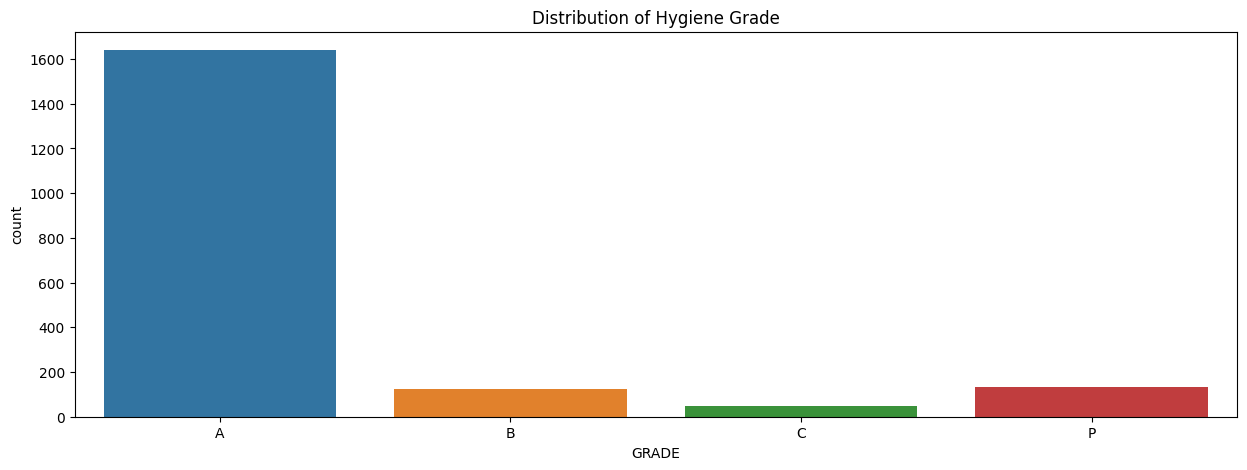

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = 'GRADE', data = new_df, order = ['A', 'B', 'C', 'P']) 
ax.set_title('Distribution of Hygiene Grade')

Text(0.5, 1.0, 'Distribution of Borough')

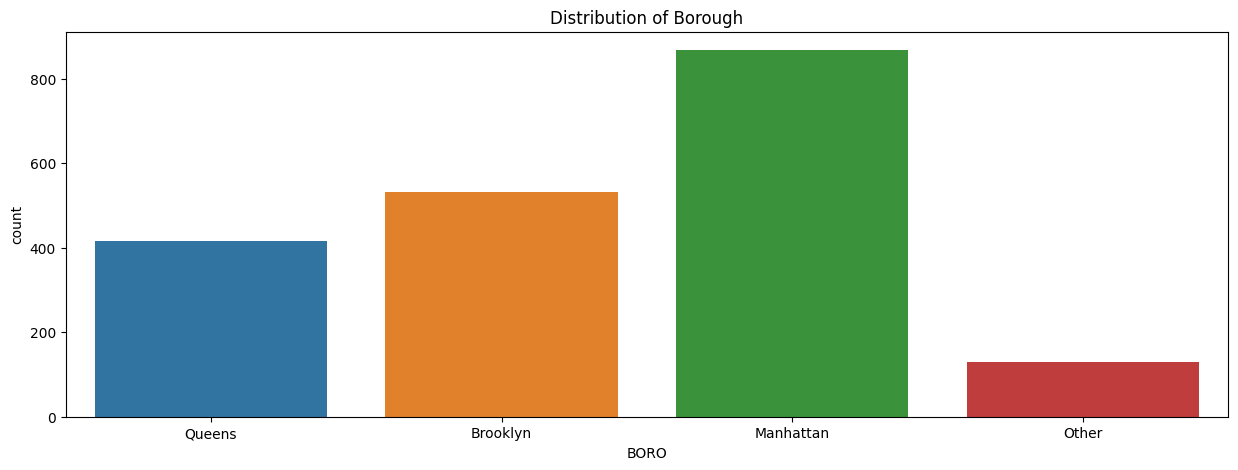

In [ ]:
new_df['BORO'] = new_df['BORO'].replace('Bronx','Other')
new_df['BORO'] = new_df['BORO'].replace('Staten Island','Other')

fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = 'BORO', data = new_df) 
ax.set_title('Distribution of Borough')

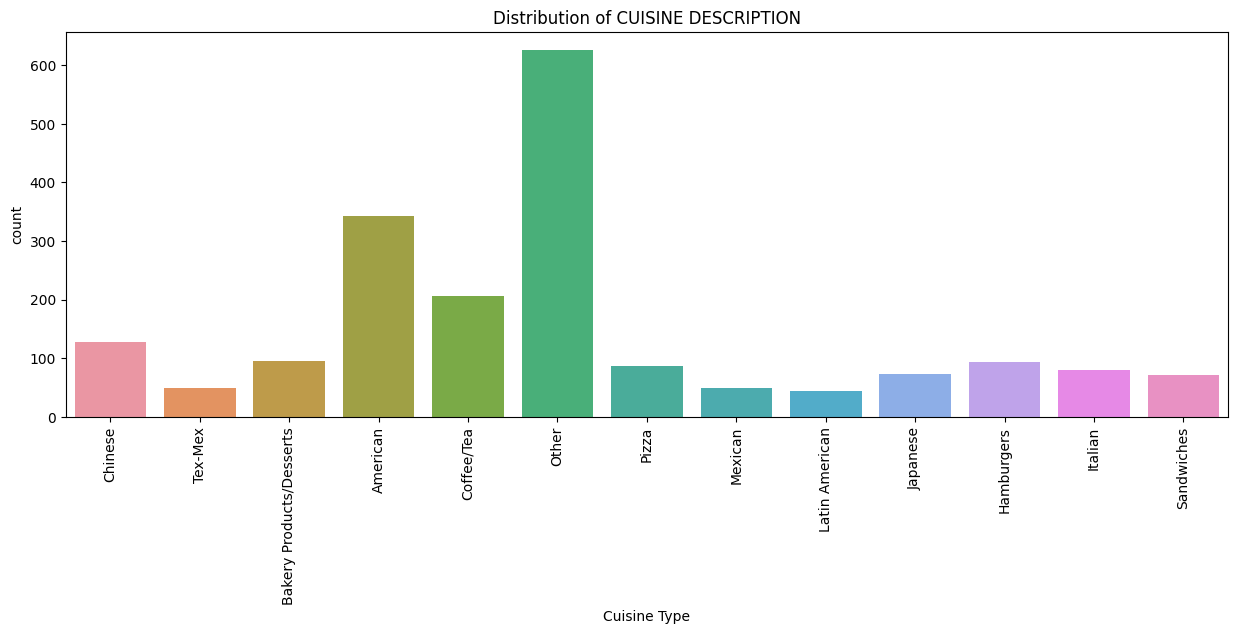

In [ ]:
s = new_df['CUISINE DESCRIPTION'].value_counts()
new_df['CUISINE DESCRIPTION'] = np.where(new_df['CUISINE DESCRIPTION'].isin(s.index[s < 40]), 'Other', new_df['CUISINE DESCRIPTION'])
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = 'CUISINE DESCRIPTION', data = new_df) 
ax.set_title('Distribution of CUISINE DESCRIPTION')
ax.set(xlabel='Cuisine Type')
ax.tick_params(axis = 'x', rotation = 90)

In [ ]:
from google.colab import files
new_df.to_csv('../datasets/concat_restaurant_hygiene.csv') 
files.download('../datasets/concat_restaurant_hygiene.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split
X = new_df.drop(columns = ['rating', 'CAMIS', 'Latitude', 'Longitude', 'SCORE', 'GRADE DATE', 'id', 'name', 'location', 'url'])
y = new_df['rating']
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories = [['$', '$$', '$$$', '$$$$']]).fit(X_dev['price'].to_numpy().reshape(-1, 1))
X_dev['price'] = enc.transform(X_dev['price'].to_numpy().reshape(-1, 1))
X_test['price'] = enc.transform(X_test['price'].to_numpy().reshape(-1, 1))

In [ ]:
enc = OrdinalEncoder(categories = [['Z', 'P', 'C', 'B', 'A']]).fit(X_dev['price'].to_numpy().reshape(-1, 1))
X_dev['price'] = enc.transform(X_dev['price'].to_numpy().reshape(-1, 1))
X_test['price'] = enc.transform(X_test['price'].to_numpy().reshape(-1, 1))

In [ ]:
from category_encoders import TargetEncoder
num_cols = X_dev._get_numeric_data().columns
cat_cols = list(set(X_dev.columns) - set(num_cols))
cat_cols
# te = TargetEncoder(cols = cat_cols, handle_unknown='ignore').fit(X_dev, y_dev) 
# X_dev_transformed = te.transform(X_dev)
# X_test_transformed = te.transform(X_test)

['CUISINE DESCRIPTION', 'GRADE', 'BORO']

In [ ]:
enc = OrdinalEncoder().fit(X_dev['CUISINE DESCRIPTION'].to_numpy().reshape(-1, 1))
X_dev['CUISINE DESCRIPTION'] = enc.transform(X_dev['CUISINE DESCRIPTION'].to_numpy().reshape(-1, 1))
X_test['CUISINE DESCRIPTION'] = enc.transform(X_test['CUISINE DESCRIPTION'].to_numpy().reshape(-1, 1))

In [ ]:
enc = OrdinalEncoder().fit(X_dev['BORO'].to_numpy().reshape(-1, 1))
X_dev['BORO'] = enc.transform(X_dev['BORO'].to_numpy().reshape(-1, 1))
X_test['BORO'] = enc.transform(X_test['BORO'].to_numpy().reshape(-1, 1))

<Axes: >

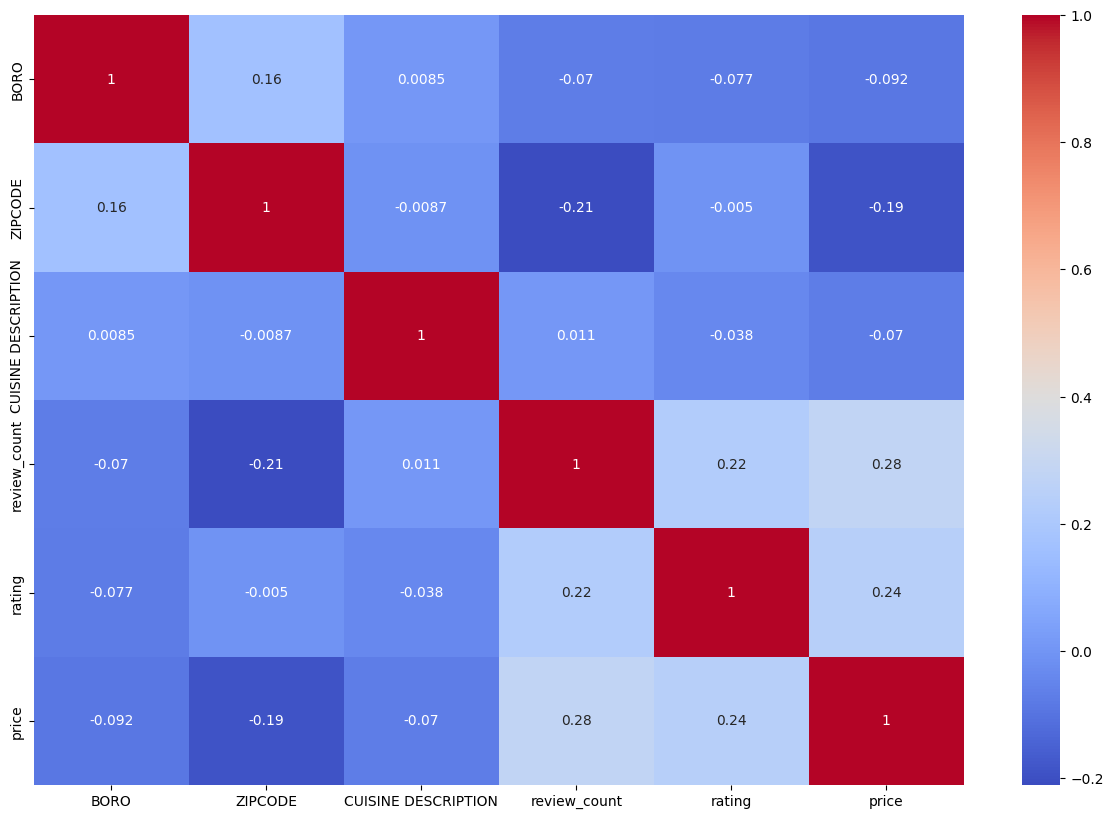

In [ ]:
corr_matrix = X_dev.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize": 10}, cmap='coolwarm') 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_dev, y_dev)

y_pred_dev = dt.predict(X_dev)
y_pred_test = dt.predict(X_test)

acc_test = dt.score(X_test, y_test)
f1_test = f1_score(y_test, y_pred_test, average=None)

acc_dev = dt.score(X_dev, y_dev)
f1_dev = f1_score(y_dev, y_pred_dev, average=None)

print("Accuracy of development test: ", acc_dev)
print("F1 score of development test: ", f1_dev)
print("Accuracy of testing test: ", acc_test)
print("F1 score of testing test: ", f1_test)

Accuracy of development test:  0.9845758354755784
F1 score of development test:  [0.9927839  0.93939394 0.93333333 0.83333333 0.95604396]
Accuracy of testing test:  0.7435897435897436
F1 score of testing test:  [0.86377709 0.20408163 0.23076923 0.         0.125     ]


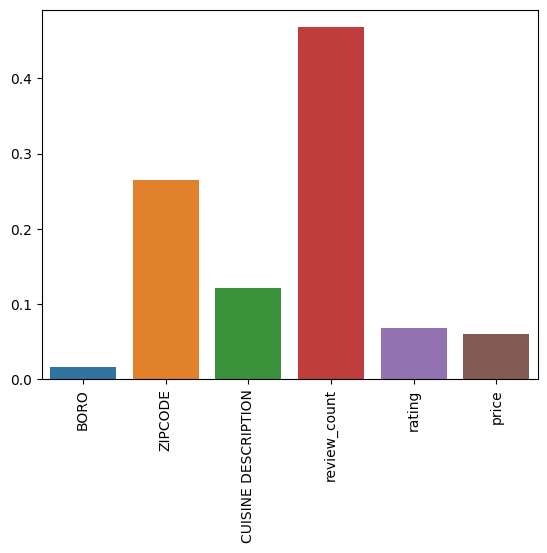

In [ ]:
ax = sns.barplot(x = X_dev.columns, y = dt.feature_importances_)
ax.tick_params(axis = 'x', rotation = 90)